In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import scipy as sp
from scipy import optimize
from numpy import linalg

In [39]:
def natural_spl(n, f, x_1, x_2):
    x = np.arange(n, dtype = 'float64') /(n- 1) * (x_2 - x_1) 
    y = f(x)
    dx = x[1:] - x[:-1]
    dy = y[1:] - y[:-1]
    A = (1/3.) *np.diag(dx[:-1] + dx[1:]) + (1/6.)* np.diag(dx[1:-1], -1)+ (1/6.) *np.diag(dx[1:-1], 1)
    f = dy[1:]/dx[1:] - dy[:-1]/dx[:-1]
    m = np.append(np.append(0,linalg.solve(A,f)),0)
    return x,y,m
def spl(x,y,m,t):
    n = 0
    for i in range(len(x)):
        if(x[i] > t):
            n = i; 
            break
    s = (((x[n] - t)**3)*m[n-1] + ((t - x[n-1])**3)*m[n])/(6.*(x[n] - x[n-1]))+((x[n] - t)*y[n-1] + (t - x[n-1])*y[n])/(x[n] - x[n-1])- 1/6. *(x[n] - x[n-1])*((x[n] - t)*m[n-1] + (t - x[n-1])*m[n])
    return s


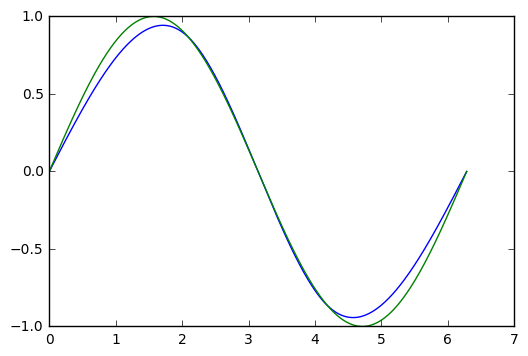

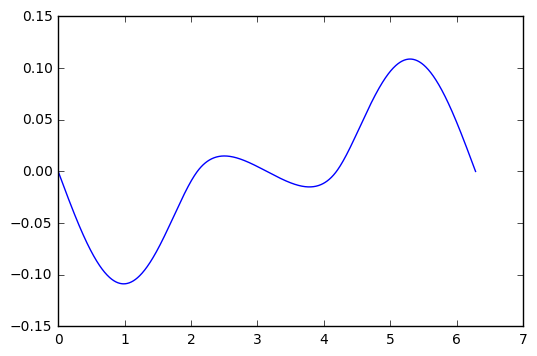

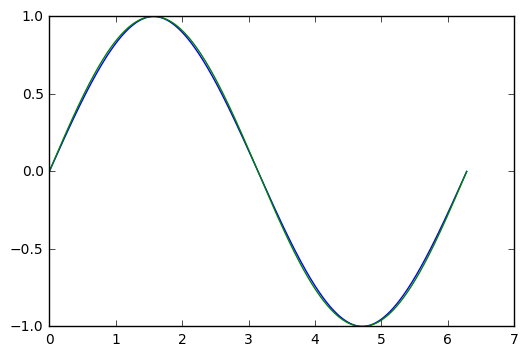

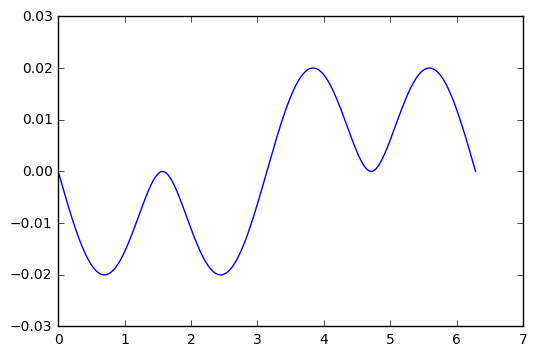

In [42]:
for i in range(4,6):
    x,y,m = natural_spl(i, np.sin, 0, 2*np.pi)
    l = np.linspace(0, 2*np.pi, 1000)
    a =[]
    for j in l:
        a.append(spl(x,y,m, j))
    b =[]
    for j in l:
        b.append(np.sin(j))

    plt.plot(l, a)
    plt.plot(l, b)
    plt.show() 
    
    a =[]
    for j in l:
        a.append(spl(x,y,m, j) - np.sin(j))
    plt.plot(l, a)
    plt.show()
    
    


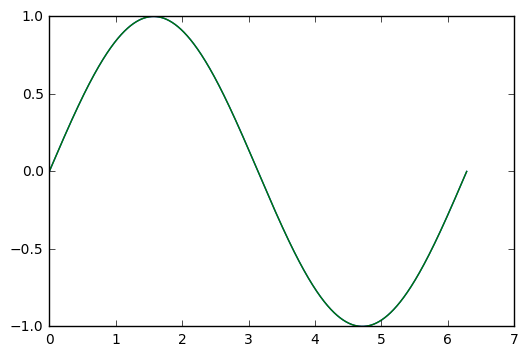

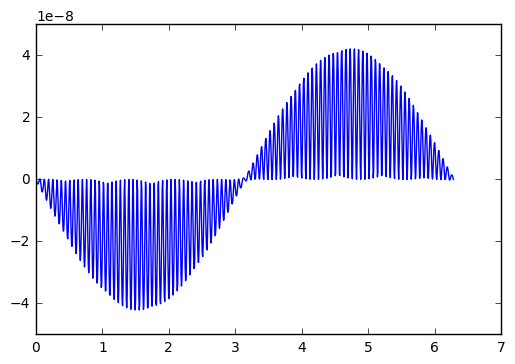

In [43]:
i=100
x,y,m = natural_spl(i, np.sin, 0, 2*np.pi)
l = np.linspace(0, 2*np.pi, 1000)
a =[]
for j in l:
    a.append(spl(x,y,m, j))
b =[]
for j in l:
    b.append(np.sin(j))

plt.plot(l, a)
plt.plot(l, b)
plt.show() 

a =[]
for j in l:
    a.append(spl(x,y,m, j) - np.sin(j))
plt.plot(l, a)
plt.show()
    

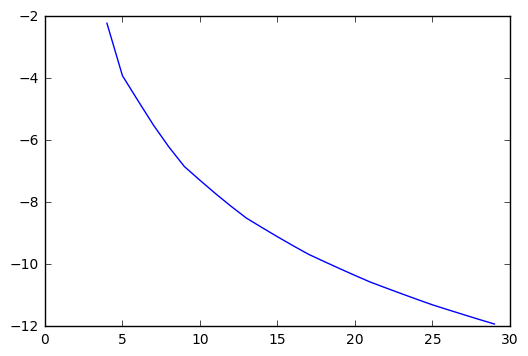

In [59]:
l = np.linspace(0, 2*np.pi, 1000)
max_err =[]
for i in range(4,30):
    x,y,m = natural_spl(i, np.sin, 0, 2*np.pi)
    err = 0
    for j in l:
        if(np.abs(spl(x,y,m, j) - np.sin(j)) > err):
            err = np.abs(spl(x,y,m, j) - np.sin(j))
    max_err.append(np.log(err))
plt.plot(np.arange(4,30), max_err)
plt.show() 
    